# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [158]:
from sklearn.datasets import load_diabetes
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns

In [137]:
dia = load_diabetes()

In [138]:
dia

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [139]:
dia.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [140]:
print(dia['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [141]:
### 1.- 10 atributos numéricos, que son valores numéricos predictivos.
### 2.- Data contiene los atributos numéricos, que intentan explicar el target.
### 3.- 442 observaciones.

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [142]:
df_data = pd.DataFrame(dia['data'], columns=dia['feature_names'])
df_target = pd.Series(dia['target'],name='target')
print(f"Data tiene {df_data.shape[0]} observaciones y {df_data.shape[1]} columnas")

Data tiene 442 observaciones y 10 columnas


In [143]:
df_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [144]:
df_target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [145]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [146]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [147]:
diabetes_data_train = df_data.iloc[:len(df_data)-20,:]
diabetes_target_train = df_target.iloc[:len(df_target)-20]
diabetes_data_test = df_data.iloc[-20:,:]
diabetes_target_test = df_target.iloc[-20:]

In [148]:
print(diabetes_data_train.shape)
print(diabetes_target_train.shape)
print(diabetes_data_test.shape)
print(diabetes_target_test.shape)

(422, 10)
(422,)
(20, 10)
(20,)


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

In [149]:
diabetes_data_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021395,0.007207
419,-0.020045,-0.044642,-0.054707,-0.053870,-0.066239,-0.057367,0.011824,-0.039493,-0.074093,-0.005220
420,0.023546,-0.044642,-0.036385,0.000079,0.001183,0.034698,-0.043401,0.034309,-0.033246,0.061054


<Axes: >

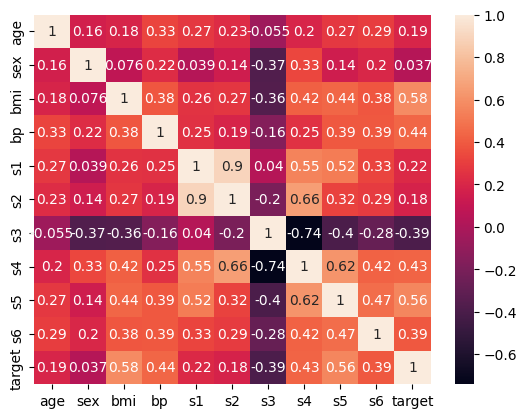

In [150]:
df_train = diabetes_data_train.copy()
df_train['target'] = diabetes_target_train.copy()

sns.heatmap(df_train.corr(numeric_only=True),annot=True)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [151]:
diabetes_model.fit(diabetes_data_train,diabetes_target_train)

LinearRegression()

In [152]:
print(diabetes_model.intercept_)
print(diabetes_model.coef_)

152.76429169049118
[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [153]:
predictions = diabetes_model.predict(diabetes_data_test)
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

y = a + b*x1 + c*x2 + d*x3 + ....

#### Print your `diabetes_target_test` and compare with the prediction. 

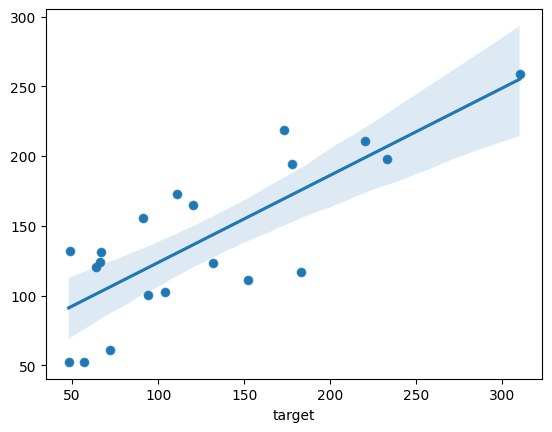

In [154]:
sns.scatterplot(x = diabetes_target_test, y = predictions)
sns.regplot(x = diabetes_target_test, y = predictions);

#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [155]:
print('MAE:', metrics.mean_absolute_error(diabetes_target_test, predictions))
print('RMSE:', metrics.root_mean_squared_error(diabetes_target_test, predictions))


MAE: 36.60961865545879
RMSE: 44.77185149548999


#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

In [167]:
### Nuevo modelo con menos columnas, según corr
df_data2 = df_data[['age','bmi','bp','s1','s2','s3','s4','s5','s6']].copy()
diabetes_data_train2 = df_data2[:-20]
diabetes_target_train2 = df_target.iloc[:-20]
diabetes_data_test2 = df_data2[-20:]
diabetes_target_test2 = df_target.iloc[-20:]

In [168]:
diabetes_target_train2

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
417     55.0
418     84.0
419     42.0
420    146.0
421    212.0
Name: target, Length: 422, dtype: float64

In [169]:
diabetes_model2 = LinearRegression()
diabetes_model2.fit(diabetes_data_train2,diabetes_target_train2)
predictions2 = diabetes_model2.predict(diabetes_data_test2)
predictions2

array([216.18098806, 155.91081226, 181.32943714, 108.98333029,
       168.11426195, 143.24040883, 266.46440699,  95.98913973,
       103.43300697, 135.59084285, 209.19682394,  59.57206428,
       123.2456377 , 109.34972268,  51.46133578, 201.96801075,
       113.04090899, 130.24687054, 201.6061168 ,  57.81831875])

In [170]:
std_scale = preprocessing.StandardScaler().fit(diabetes_data_train2) ### OJO: el fit aquí es un ajuste. Creamos el escalador
X_train_scal = std_scale.transform(diabetes_data_train2) ### Y normalizamos los datos, dado el escalador. 

lm_scal = LinearRegression() ### Aquí sí tenemos el modelo.
lm_scal.fit(X_train_scal, diabetes_target_train) ### Y aquí entrenamos el modelo, con los valores normaluzados.
predictions_scal = lm_scal.predict(diabetes_data_test2)
predictions_scal


c:\Users\raulg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([156.38959296, 153.52198434, 154.72869277, 151.26491488,
       154.10374261, 152.89073375, 158.79130035, 150.647099  ,
       151.01207659, 152.53297112, 156.0618591 , 148.90101053,
       151.93838614, 151.28346448, 148.51269893, 155.71158712,
       151.46703882, 152.27472026, 155.69996085, 148.82756777])

In [171]:
print('MAE original:', metrics.mean_absolute_error(diabetes_target_test, predictions))
print('RMSE original:', metrics.root_mean_squared_error(diabetes_target_test, predictions))
print('MAE nueva:', metrics.mean_absolute_error(diabetes_target_test2, predictions2))
print('RMSE nueva:', metrics.root_mean_squared_error(diabetes_target_test2, predictions2))
print('MAE nueva:', metrics.mean_absolute_error(diabetes_target_test2, predictions_scal))
print('RMSE nueva:', metrics.root_mean_squared_error(diabetes_target_test2, predictions_scal))

MAE original: 36.60961865545879
RMSE original: 44.77185149548999
MAE nueva: 36.98844387102941
RMSE nueva: 46.118094583188764
MAE nueva: 63.03494093539793
RMSE nueva: 72.47801741580284


In [172]:
### No saco nada mejor de lo que ya hay :P